In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re
pattern=re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")  #保留西藏、海口、台湾等格式有问题的城市

In [3]:
city_location={}
for line in coordination_source.split('\n'):
    city_info=pattern.findall(line) #re.compile+findall返回所有符合compile条件的列表
    if not city_info: continue
    city, long, lat=city_info[0]
    long, lat=float(long),float(lat)
    city_location[city]=(long,lat)
city_location

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '台湾': (121.3, 25.03),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '海口': (110.35, 20.02),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '西藏': (91.11, 29.97),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [4]:
import math
def geo_distance(origin,destination):  
#haversine distance基于经纬度的距离计算
#haversin(d/R)=haversine(lat2-lat1)+cos(lat1)cos(lat2)haversine(long2-long1)
#haversine(x)=sin(x/2)^2=(1-cos(x))/2
#R为地球半径，取均值6371km
    lat1,lon1=origin
    lat2,lon2=destination
    radius=6371
    dlat=math.radians(lat2-lat1)   #radians为角度转弧度（360度转为2pi）
    dlon=math.radians(lon2-lon1)
    a=((math.sin(dlat/2))**2)+math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*((math.sin(dlon/2))**2)
    d=radius*math.asin(math.sqrt(a))*2
    return d
def get_city_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [5]:
get_city_distance('杭州','上海')

153.5185697155768

### Draw the graph

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
#plt.rcParams['axes.unicode_minus']=False

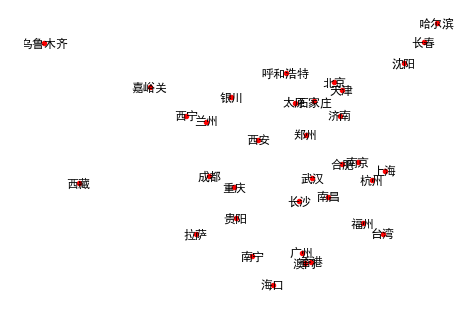

In [9]:
%matplotlib inline
city_graph=nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
nx.draw(city_graph,city_location,with_labels=True,node_size=20)

In [10]:
threshold=700 #assume 2 cities are connected if their distance is less than 700km

In [11]:
from collections import defaultdict
def build_connection(city_location):
    cities_connection=defaultdict(list)
    cities=list(city_location.keys())
    for c1 in cities:
        for c2 in cities:
            if c1==c2: continue
            if get_city_distance(c1,c2)<threshold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connection=build_connection(city_location)

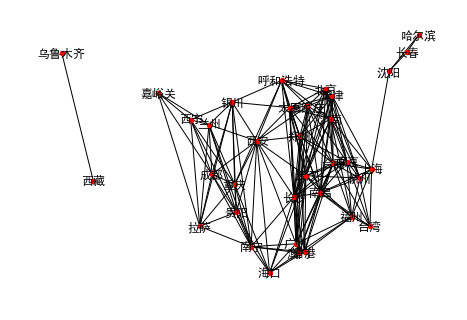

In [12]:
cities_connection_graph=nx.Graph(cities_connection)
nx.draw(cities_connection_graph,city_location,with_labels=True,node_size=20)  #1st param是图像，2nd param是位置，如果缺省，会使用spring layout positioning

### BFS/DFS

In [13]:
def search_1(graph,start,destination):
    pathes=[[start]]
    visited=set()
    while pathes:
        path=pathes.pop(0)
        frontier=path[-1]
        if frontier in visited: continue
        successors=graph[frontier]
        for city in successors:
            if city in path: continue  #avoid loop
            new_path=path+[city]  #已有路径+新出现的city作为一个列表元素
            #pathes.append(new_path)  #bfs，执行结果是所有同深度路径均储存在path中，FIFO
            pathes=[new_path]+pathes  #dfs，执行最深路径，LIFO，与bfs代码区别是new_path的顺序
            if city==destination:
                return new_path
        visited.add(frontier)

In [14]:
search_1(cities_connection,'上海','香港')

['上海', '天津', '呼和浩特', '银川', '南宁', '香港']

### Optimal search using variation of BFS

In [15]:
def search_2(graph, start, destination,search_strategy):
    pathes=[[start]]  #使用visited会导致可能忽略有更低path cost且到达终点的path
    while pathes:
        path=pathes.pop(0)
        frontier=path[-1]
        successors=graph[frontier]
        for city in successors:
            if city in path:continue
            new_path=path+[city]
            pathes.append(new_path)
        pathes=search_strategy(pathes)
        #visited.add(frontier)
        if pathes and (destination==pathes[0][-1]):
            return pathes[0]

In [16]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance=0
        for i, _ in enumerate(path[:-1]):
            distance+=get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [17]:
search_2(cities_connection,'北京','上海',search_strategy=lambda x:x)

['北京', '济南', '上海']

In [18]:
search_2(cities_connection,'北京','上海',search_strategy=sort_by_distance)

['北京', '天津', '上海']

### Linear Regression

In [19]:
from sklearn.datasets import load_boston
import random
dataset=load_boston()
x,y=dataset['data'],dataset['target']

In [20]:
x.shape

(506, 13)

In [21]:
y.shape

(506,)

In [22]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [23]:
dataset['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

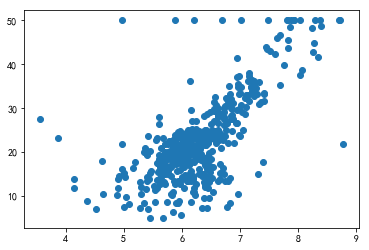

In [24]:
x_rm=x[:,5]
plt.scatter(x_rm,y) #plot RM with respect to y

In [25]:
#define target function
def price(rm,k,b):
    return k*rm+b

### Define mean square loss

### $$loss=\frac{1}{n} \sum{(y_i-\hat(y_i))}^2$$

In [26]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### Define partial derivatives

### $$\frac{\partial{loss}}{\partial{k}}=-\frac{2}{n}\sum{(y_i-\hat{y_i})}x_i$$

### $$\frac{\partial{loss}}{\partial{b}}=-\frac{2}{n}\sum{(y_i-\hat{y_i})}$$

In [27]:
def partial_derivative_k(x,y,y_hat):
    n=len(y)
    gradient=0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient +=(y_i-y_hat_i)*x_i
    return -2/n*gradient
def partial_derivative_b(y,y_hat):
    n=len(y)
    gradient=0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient +=(y_i-y_hat_i)
    return -2/n*gradient

In [28]:
k=random.random()*200-100  #-100到100之间
b=random.random()*200-100
learning_rate=1e-3
iteration_num=200
losses=[]
for i in range(iteration_num):
    price_use_current_parameters=[price(r,k,b) for r in x_rm]
    current_loss=loss(y,price_use_current_parameters)
    losses.append(current_loss)
    print('Iteration {}, loss is {}, parameters k is {} and b is {}'.format(i,current_loss,k,b))
    k_gradient=partial_derivative_k(x_rm,y,price_use_current_parameters)
    b_gradient=partial_derivative_b(y,price_use_current_parameters)
    k +=(-1) * k_gradient * learning_rate
    b +=(-1) * b_gradient * learning_rate
best_k=k
best_b=b

Iteration 0, loss is 11724.03748483544, parameters k is 25.270264177867418 and b is -28.803000299188113
Iteration 1, loss is 9887.979079664627, parameters k is 23.90340526637225 and b is -29.017957428400894
Iteration 2, loss is 8340.535554558857, parameters k is 22.64856773819432 and b is -29.215304226319567
Iteration 3, loss is 7036.338772511518, parameters k is 21.496570925427424 and b is -29.396483940482153
Iteration 4, loss is 5937.152134068649, parameters k is 20.438986558149427 and b is -29.562821537649143
Iteration 5, loss is 5010.749552062831, parameters k is 19.46807710194498 and b is -29.715533397457556
Iteration 6, loss is 4229.970643276023, parameters k is 18.57673914895199 and b is -29.855736211635417
Iteration 7, loss is 3571.924437026058, parameters k is 17.75845144827233 and b is -29.98445515388466
Iteration 8, loss is 3017.318254908338, parameters k is 17.007227195529588 and b is -30.102631380204528
Iteration 9, loss is 2549.8920857074345, parameters k is 16.3175702325

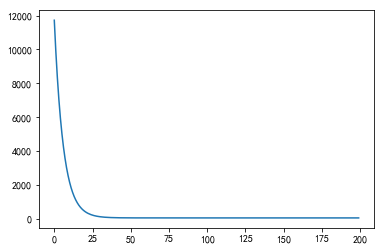

In [29]:
plt.plot(list(range(iteration_num)),losses)

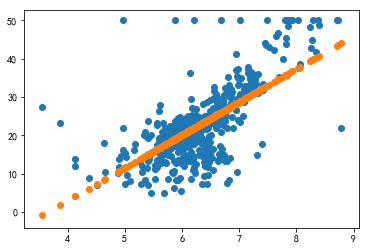

In [30]:
price_use_best_parameters=[price(r,best_k,best_b) for r in x_rm]
plt.scatter(x_rm,y)
plt.scatter(x_rm,price_use_current_parameters)